# Materialien zu <i>agla</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Hyperbolische Geometrie 

<br>

In [1]:
%run agla/start

<br>
## Berechnung von Dreiecken 

### Verwendete Sätze 

<b>Seitenkosinussatz</b> $\:\:\:\:\:\: \cosh c = \cosh a\, \cosh b - \sinh a\, \sinh b\, \cos \gamma $
<br>
<br><b>Winkelkosinussatz</b> $\:\:\:\:\:\, \cos \alpha = - \cos \beta\, \cos\gamma + \sin \beta \, \sin \gamma\, \cosh a	$ 
<br><br>
<b>Sinussatz</b>$ \:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\: \frac{\sin \alpha}{\sin \beta} = \frac{\sinh a}{\sinh b} $
<br><br>
<b>Halbseitensatz</b> $ \:\:\:\:\:\:\:\:\:\:\:\:\tan \frac{c} {R} = \sqrt{\frac{-\cos s\, \cos (s-\gamma)}{\cos (s-\alpha)\, \cos (s-\beta)}}, \:\:\:\:\:
s = \frac{\alpha + \beta + \gamma}{2}, \:\:\:\:\: R $- Radius 
<br><br>
$\qquad\qquad\qquad\quad\:\:$ (Satz der sphärischen Geometrie, $\:R\:$ wird durch $\:i\:$ ersetzt)

Weitere Sätze sind durch die zyklischen Vertauschungen $\:\: a \rightarrow b \rightarrow c \rightarrow a, 
\:\:\alpha \rightarrow \beta \rightarrow \gamma \rightarrow \alpha \:\:$ zu gewinnen



Die Maßeinheit für Winkel ist Grad, es werden die entsprechenden Funktionen benutzt
<br><br>

### <br> Grundaufgabe SSS  (1)

In [26]:
# Gegeben sind die drei Seiten

a = 2; b = 3.5; c = 1.7

# Die Winkel werden nach dem Seitenkosinussatz berechnet

wic = N(acosg((cosh(a)*cosh(b)-cosh(c))/(sinh(a)*sinh(b))))

wia = N(acosg((cosh(b)*cosh(c)-cosh(a))/(sinh(b)*sinh(c))))

wib = N(acosg((cosh(a)*cosh(c)-cosh(b))/(sinh(a)*sinh(c))))

wia, wib, wic


(9.92298225786045, 128.187167858749, 7.22134301861041)

### <br> Grundaufgabe WWW (2)

In [3]:
# Gegeben sind die drei Winkel

wia = 9.92298225786045; wib = 128.187167858749; wic = 7.22134301861041

# Die Berechnung der Seiten erfolgt auf der Grundlage des Halbseitensatzes der
# sphärischen Geometrie

s = 1/2 * (wia + wib + wic)

c = (N(abs(2*R*atan(sqrt(-cosg(s)*cosg(s-wic)/cosg(s-wia)/cosg(s-wib)))))).subs(R, I)

a = (N(abs(2*R*atan(sqrt(-cosg(s)*cosg(s-wia)/cosg(s-wib)/cosg(s-wic)))))).subs(R, I)

b = (N(abs(2*R*atan(sqrt(-cosg(s)*cosg(s-wib)/cosg(s-wia)/cosg(s-wic)))))).subs(R, I)

a, b, c

(1.99999999999991, 3.49999999999979, 1.69999999999988)

### <br> Grundaufgabe SWS (3)

In [4]:
# Gegeben sind zwei Seiten und der eingeschlossene Winkel

a = 2; b = 3.5; wic = 7.22134301861041

# Die fehlende Seite wird nach dem Seitenkosinussatz

c = N(acosh(cosh(a)*cosh(b) - sinh(a)*sinh(b)*cosg(wic)))

# Die Winkel werden durch Lösen eines Gleichungssystems auf der 
# Basis des Winkelkosinussatzes erhalten

wia, wib = symbols('wia wib')

gl1 = cosg(wia) + cosg(wib)*cosg(wic) - sing(wib)*sing(wic)*cosh(a)
gl2 = cosg(wib) + cosg(wic)*cosg(wia) - sing(wic)*sing(wia)*cosh(b)

L = nsolve([gl1, gl2], [wia, wib], [45, 45])

wia = N(L[0]); wib = N(L[1])

# Die Winkel können auch nach dem Sinussatz ermittelt werden; 
# dort sind Mehrdeutigkeiten zu beachten  

c, wia, wib

(1.70000000000003, 9.92298225785978, 128.187167858746)

### <br> Grundaufgabe WSW (4)

In [5]:
# Gegeben sind eine Seite und die beiden anliegenden Winkel

c = 1.7; wia = 9.92298225786045; wib = 128.187167858749;

# Der fehlende Winkel wird nach dem Winkelkosinussatz berechnet  

wic = N(arccosg((sing(wia)*sing(wib)*cosh(c)-cosg(wia)*cosg(wib))))

# Die Seiten werden wie in Grundaufgabe WWW ermittelt

s = 1/2 * (wia + wib + wic)

c = N(abs(2*R*arctan(sqrt(-cosg(s)*cosg(s-wic)/cosg(s-wia)/cosg(s-wib))))).subs(R, I)

a = N(abs(2*R*arctan(sqrt(-cosg(s)*cosg(s-wia)/cosg(s-wib)/cosg(s-wic))))).subs(R, I)

b = N(abs(2*R*arctan(sqrt(-cosg(s)*cosg(s-wib)/cosg(s-wia)/cosg(s-wic))))).subs(R, I)

a, b, wic

(2.00000000000272, 3.5000000000027, 7.22134301859021)

<br>
## Konstruktion von Dreiecken 

### Dreieck in Ursprungslage 

Bei gegebenen drei Seiten kann ein Dreieck mit einer Ecke ($A$) im (euklidischen) Ursprung<br>
konstruiert werden. Wenn der 2.  Eckpunkt ($B$) auf die  positive $x$-Achse gelegt wird, sind die <br>
Seiten $c$ und $b$ hyperbolische Strecken, deren Träger Durchmesser des Einheitskreises sind<br><br>

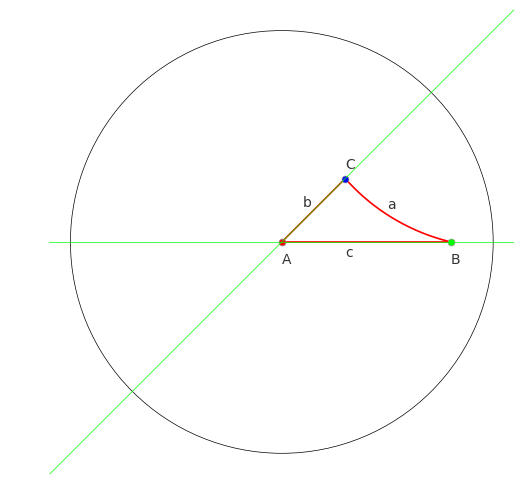

In [6]:
# Beispiel für die Lage eines solcheen Dreiecks

A = hPunkt(0, 0); B = hPunkt(0.8, 0); C = hPunkt(0.3, 0.3)
d = hDreieck(A, B, C)

sicht_box(-1.1, 1.1)
zeichne(EinhKreis2, [d, rot, 2], 
        [A, rot, 2], [B, gruen, 2], [C, blau, 2],
        [Gerade(v(-1, 0), v(1, 0)), gruen],
        [Gerade(O2, C.e), gruen], 
        bez = [(O2-v(0,0.1), 'A'),
               (B.e-v(0, 0.1), 'B'),
               (C.e+v(0, 0.05), 'C'),
               (v(0.3, -0.07), 'c'),
               (v(0.5, 0.16), 'a'),
               (v(0.1, 0.17), 'b')],
        achsen=nein)

In [7]:
d.längen

(1.86439895327004, 0.905761413341474, 2.19722457733622)

<br>Die nachfolgenden Anweisungen erzeugen ein solches Dreieck anhand der 3 <br>
vorgegebenen Seitenlängen 
<br>

In [54]:
a = 1.5; b = 2; c = 1.8

p = Symbol('p', real=True)
q = Symbol('q', real=True)
r = Symbol('r', real=True)

A = hPunkt(0, 0)
B = hPunkt(p, 0)
C = hPunkt(q, r)  

L = solve(A.abstand(B) - c, numeric=True)   # Verwendung von solve wegen
p0 = L[1]                                   # des Zusatzes

B = B.subs(p, p0)

# Weiter ist das System aus den beiden Gleichungen

gl1 = A.abstand(C) - b
gl2 = B.abstand(C) - a

# nach q und r zu lösen

gl1, gl2


⎛     ⎛   ⎛ 2    2⎞     ⎞           ⎛                 ⎛ 2                     
⎜     ⎜ 2⋅⎝q  + r ⎠     ⎟           ⎜4.10747317631726⋅⎝r  + (-q + 0.7162978701
⎜acosh⎜───────────── + 1⎟ - 2, acosh⎜─────────────────────────────────────────
⎜     ⎜   2    2        ⎟           ⎜                     2    2              
⎝     ⎝- q  - r  + 1    ⎠           ⎝                  - q  - r  + 1          

      2⎞    ⎞      ⎞
99024) ⎠    ⎟      ⎟
──────── + 1⎟ - 1.5⎟
            ⎟      ⎟
            ⎠      ⎠

In [55]:
L1 = solve([gl1, gl2], set=True)
L1

([q, r], set([(0.666502947807627, -0.36850980848509), (0.666502947807627, 0.36
850980848509)]))

In [56]:
q0 = list(L1[1])[0][0]    # beide Lösungen sollen positiv sein
r0 = list(L1[1])[0][1]
q0, r0

(0.666502947807627, 0.36850980848509)

In [57]:
C = hPunkt(q0, r0)

In [58]:
A.e, B.e, C.e

(Vektor, Vektor, Vektor)

In [59]:
d1 = hDreieck(A, B, C)

In [60]:
d1.längen, d1.winkel   # das Dreieck hat die vorgegebenen Seiten

((1.5, 2.0, 1.8), (28.938227483351053, 55.50574218395355, 41.95848811252205))

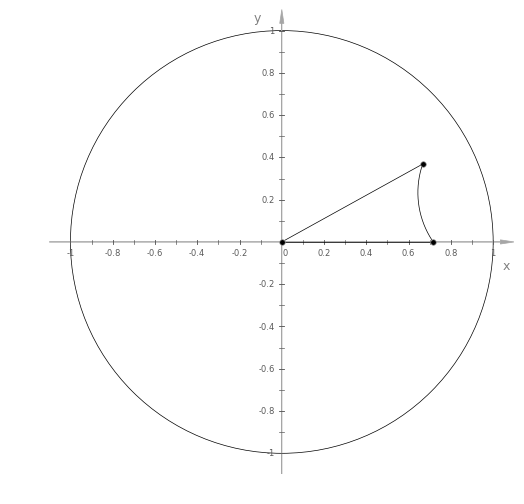

In [15]:
zeichne(EinhKreis2, d1, A, B, C)

### <br>Dreieck in beliebiger Lage

In [27]:
# Mit der folgenden Isometrie kann der Ursprung in den Punkt P(r, s)
# überführt werden (siehe Isometrien im D-Modell)

r, s = Symbol('r', real=True), Symbol('s', real=True)

a = (r-s)/(r^2+s^2) + (r+s)/(r^2+s^2)*I
b = 1+I

f = lambda z: (a*conjugate(z)+conjugate(b)) / (b*conjugate(z)+conjugate(a))
f(z)


⎛ r - s    ⅈ⋅(r + s)⎞ _        
⎜─────── + ─────────⎟⋅z + 1 - ⅈ
⎜ 2    2     2    2 ⎟          
⎝r  + s     r  + s  ⎠          
───────────────────────────────
 r - s    ⅈ⋅(r + s)           _
─────── - ───────── + (1 + ⅈ)⋅z
 2    2     2    2             
r  + s     r  + s              

In [34]:
einfach(re(f(0))), einfach(im(f(0)))   # Kontrolle

(r, s)

In [18]:
P = hPunkt(-0.5, 0.6)   # Ziel-Bild des Ursprungs

# die entsprechende Isometrie

r, s = -0.5, 0.6
a = (r-s)/(r**2+s**2) + (r+s)/(r**2+s**2)*I;  b = 1+I

f = lambda z: (a*conjugate(z)+conjugate(b)) / (b*conjugate(z)+conjugate(a))

# Anwendung der Isometrie auf die Eckpunkte des Dreiecks d

A, B, C = d.punkte
AA = hPunkt(re(f(0)), im(f(0)))
wB = f(B.e.x+B.e.y*I); BB = hPunkt(re(wB), im(wB))
wC = f(C.e.x+C.e.y*I); CC = hPunkt(re(wC), im(wC))

AA.e.dez, BB.e.dez, CC.e.dez


(Vektor, Vektor, Vektor)

In [19]:
# Das Dreieck

dd = hDreieck(AA, BB, CC)

# ist zum obigen Dreieck d kongruent

In [20]:
dd.laengen, dd.winkel

((1.86439895327004, 0.905761413341474, 2.19722457733622), (45.0, 13.4381881583
50592, 86.5106750942036))

In [21]:
d.längen, d.winkel   # siehe oben

((1.86439895327004, 0.905761413341474, 2.19722457733622), (45.0, 13.4381881583
50592, 86.51067509420363))

In [24]:
dd.fläche, d.fläche

(0.611757742809706, 0.611757742809705)

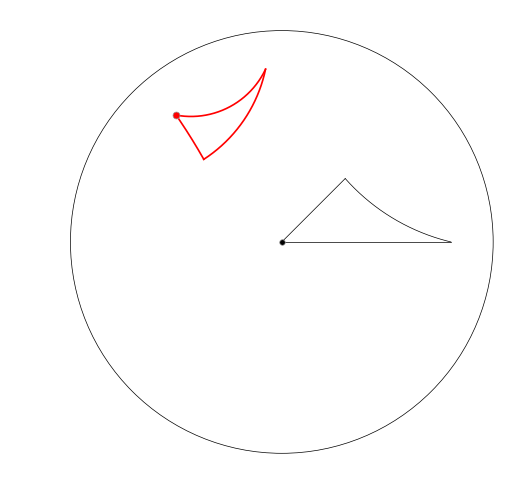

In [22]:
zeichne(EinhKreis2, d, [dd, rot, 2], A, [P, rot, 2], achsen=nein)